/home/tadenoud/.virtualenvs/ml/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


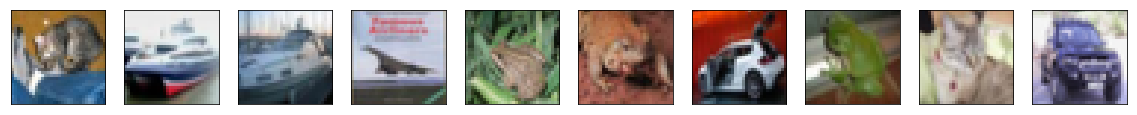

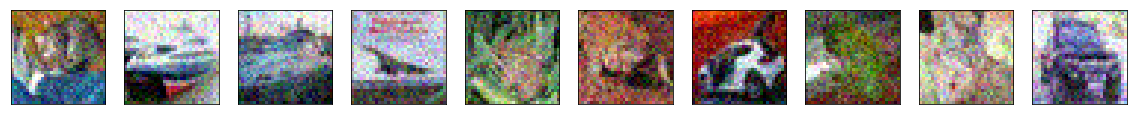

In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DATA_DIR = '/media/tadenoud/DATADisk/datasets'
use_cuda = True

def show_10_images(data):    
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(data[i].reshape(32, 32, 3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

show_10_images(x_test)
show_10_images(x_test_noisy)

In [2]:
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import UpSampling2D, Flatten, Dense, Reshape, Activation
from keras.regularizers import l1
from keras.models import Model

n_hidden = 256
input_img = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(2, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (8, 8, 32)

x = Flatten()(x)
encoded = Dense(n_hidden, activity_regularizer=l1(10e-8))(x)

# representation is now size n_hidden

x = Dense(8 * 8 * 32)(encoded)
x = Reshape((8, 8, 32))(x)

x = Conv2D(2, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
import os
from keras.callbacks import 

weight_file = './weights/cifar10_autoencoder_all_digits_binary_crossentropy_noise.hd5'

# if(False and os.path.exists(weight_file)):
#     autoencoder.load_weights(weight_file)
# else:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[])

autoencoder.save_weights(weight_file)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.6133 - val_loss: 0.6007
Epoch 2/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.5957 - val_loss: 0.5951
Epoch 3/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.5908 - val_loss: 0.5900
Epoch 4/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.5885 - val_loss: 0.5877
Epoch 5/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.5870 - val_loss: 0.5878
Epoch 6/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.5861 - val_loss: 0.5879
Epoch 7/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.5854 - val_loss: 0.5872
Epoch 8/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.5849 - val_loss: 0.5858
Epoch 9/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.5843 - val_loss: 0.

50000/50000 [==============================] - 4s 86us/step - loss: 0.5716 - val_loss: 0.5731
Epoch 78/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.5716 - val_loss: 0.5723
Epoch 79/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.5716 - val_loss: 0.5749
Epoch 80/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.5716 - val_loss: 0.5725
Epoch 81/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.5715 - val_loss: 0.5723
Epoch 82/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.5715 - val_loss: 0.5716
Epoch 83/100
50000/50000 [==============================] - 5s 91us/step - loss: 0.5715 - val_loss: 0.5723
Epoch 84/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.5714 - val_loss: 0.5717
Epoch 85/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.5714 - val_loss: 0.5725
Epoch 86/100
50000/50000 [========================

In [4]:
from keras.layers import Lambda
from keras.losses import binary_crossentropy
import keras.backend as K 

input_ = Input(shape=(32, 32, 3))
predicted = autoencoder(input_)
loss = Lambda(lambda x: binary_crossentropy(K.batch_flatten(input_), K.batch_flatten(x)))(predicted)

anomaly_detector = Model(input_, loss)

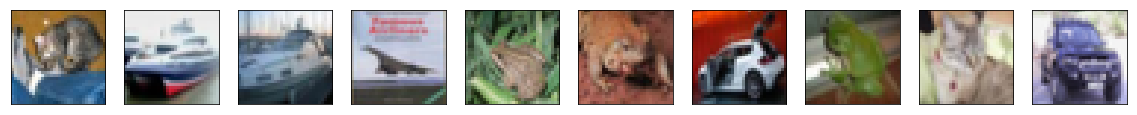

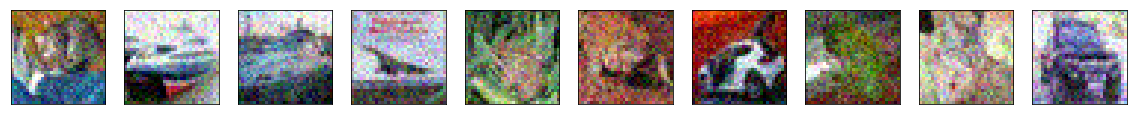

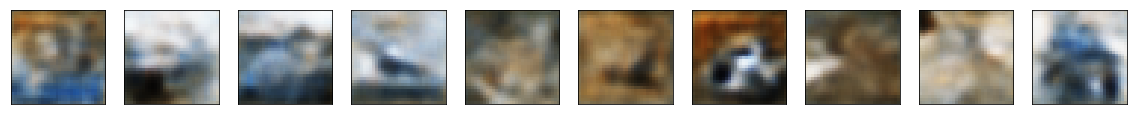

In [5]:
n = 10

# Ground truth
show_10_images(x_test)

#Images with noise added
show_10_images(x_test_noisy)

# Denoised images
show_10_images(autoencoder.predict(x_test_noisy))

# Ground truth with denoising
# show_10_images(autoencoder.predict(x_test)

## Tiny Imagenet (Crop)

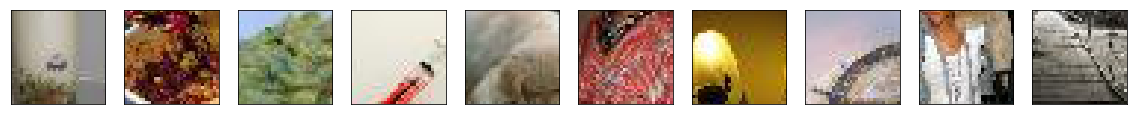

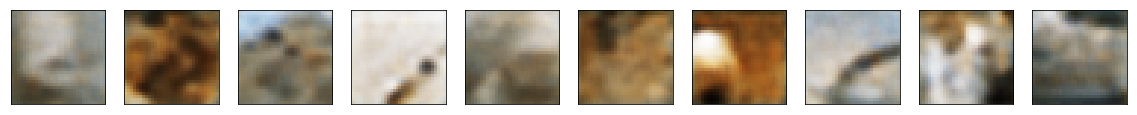

In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

import torch
from torchvision import transforms, datasets

directory = os.path.join(DATA_DIR, 'tiny-imagenet-200/test')

# Dataset transformation
transform_crop = transforms.Compose([
    transforms.RandomCrop([32, 32]),
    transforms.ToTensor()
])

# Load the dataset
imagenet_crop = datasets.ImageFolder(directory, transform=transform_crop)
imagenet_crop = np.array([np.array(x) for x, y in imagenet_crop])
imagenet_crop = imagenet_crop.astype('float32')# / 255.

imagenet_crop = np.swapaxes(imagenet_crop, 1, 3)
imagenet_crop = np.swapaxes(imagenet_crop, 1, 2)

show_10_images(imagenet_crop)
show_10_images(autoencoder.predict(imagenet_crop))

In [7]:
labels = len(x_test) * [0] + len(imagenet_crop) * [1]
test_samples = np.concatenate((x_test, imagenet_crop))
losses = anomaly_detector.predict(test_samples)
print("AUROC:", roc_auc_score(labels, losses))

AUROC: 0.452750835


## Tiny Imagenet (Resize)

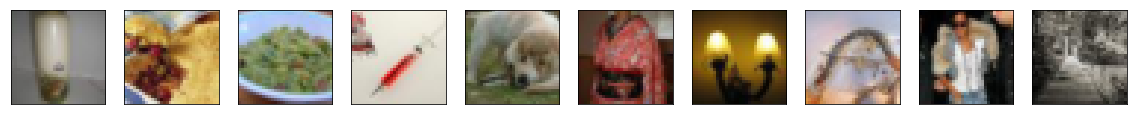

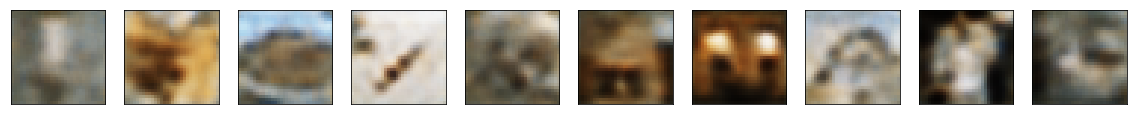

In [8]:
directory = os.path.join(DATA_DIR, 'tiny-imagenet-200/test')

# Dataset transformation
transform_resize = transforms.Compose([
    transforms.Resize([32, 32]),
    transforms.ToTensor()
])

# Load the dataset
imagenet_resize = datasets.ImageFolder(directory, transform=transform_resize)
imagenet_resize = np.array([np.array(x) for x, y in imagenet_resize])
imagenet_resize = imagenet_resize.astype('float32')# / 255.

imagenet_resize = np.swapaxes(imagenet_resize, 1, 3)
imagenet_resize = np.swapaxes(imagenet_resize, 1, 2)

show_10_images(imagenet_resize)
show_10_images(autoencoder.predict(imagenet_resize))

In [9]:
labels = len(x_test) * [0] + len(imagenet_resize) * [1]
test_samples = np.concatenate((x_test, imagenet_resize))
losses = anomaly_detector.predict(test_samples)
print("AUROC:", roc_auc_score(labels, losses))

AUROC: 0.47013222000000005


## LSUN (Crop)

(10000, 3, 32, 32)


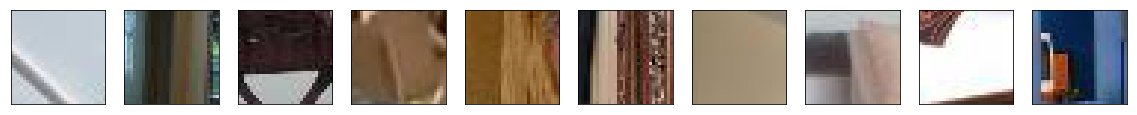

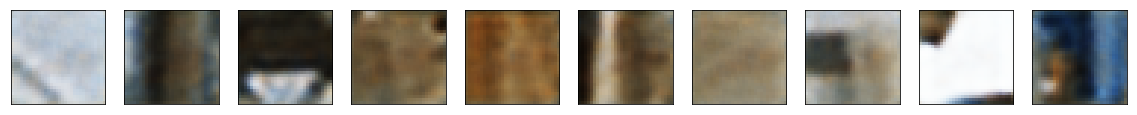

In [10]:
# Load the dataset
lsun_crop = datasets.LSUN(os.path.join(DATA_DIR, 'lsun'), classes='test', transform=transform_crop)
lsun_crop = np.array([np.array(x) for x, y in lsun_crop])
lsun_crop = lsun_crop.astype('float32')# / 255.

print(lsun_crop.shape)
lsun_crop = np.swapaxes(lsun_crop, 1, 3)
lsun_crop = np.swapaxes(lsun_crop, 1, 2)

show_10_images(lsun_crop)
show_10_images(autoencoder.predict(lsun_crop))

In [11]:
labels = len(x_test) * [0] + len(lsun_crop) * [1]
test_samples = np.concatenate((x_test, lsun_crop))
losses = anomaly_detector.predict(test_samples)
print("AUROC:", roc_auc_score(labels, losses))

AUROC: 0.40953765500000006


## LSUN (Resize)

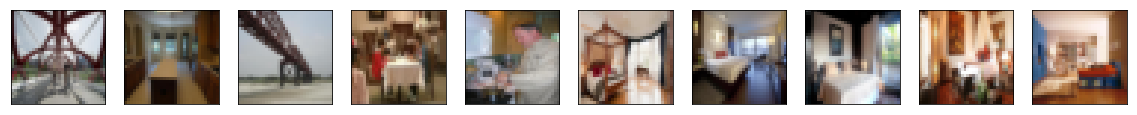

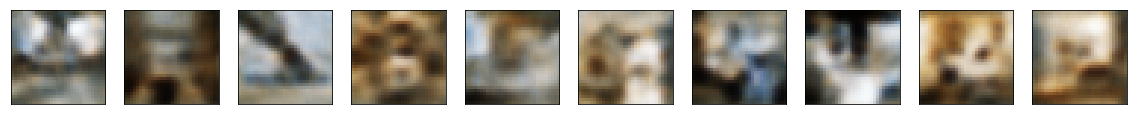

In [12]:
# Load the dataset
lsun_resize = datasets.LSUN(os.path.join(DATA_DIR, 'lsun'), classes='test', transform=transform_resize)
lsun_resize = np.array([np.array(x) for x, y in lsun_resize])
lsun_resize = lsun_resize.astype('float32')# / 255.

lsun_resize = np.swapaxes(lsun_resize, 1, 3)
lsun_resize = np.swapaxes(lsun_resize, 1, 2)

show_10_images(lsun_resize)
show_10_images(autoencoder.predict(lsun_resize))

In [13]:
labels = len(x_test) * [0] + len(lsun_resize) * [1]
test_samples = np.concatenate((x_test, lsun_resize))
losses = anomaly_detector.predict(test_samples)
print("AUROC:", roc_auc_score(labels, losses))

AUROC: 0.45933250000000003


## iSUN (Resize)

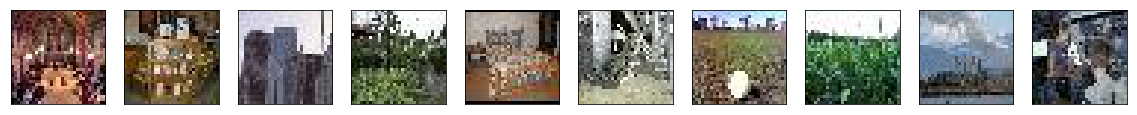

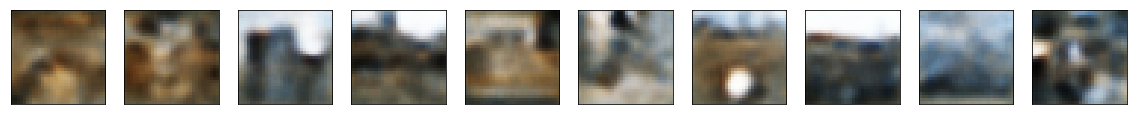

In [14]:
directory = os.path.join(DATA_DIR, 'isun')

# Load the dataset
isun_resize = datasets.ImageFolder(directory, transform=transform_resize)
isun_resize = np.array([np.array(x) for x, y in isun_resize])
isun_resize = isun_resize.astype('float32')# / 255.

isun_resize = np.swapaxes(isun_resize, 1, 3)
isun_resize = np.swapaxes(isun_resize, 1, 2)

show_10_images(isun_resize)
show_10_images(autoencoder.predict(isun_resize))

In [15]:
labels = len(x_test) * [0] + len(isun_resize) * [1]
test_samples = np.concatenate((x_test, isun_resize))
losses = anomaly_detector.predict(test_samples)
print("AUROC:", roc_auc_score(labels, losses))

AUROC: 0.5158482296918767


## Gaussian Noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

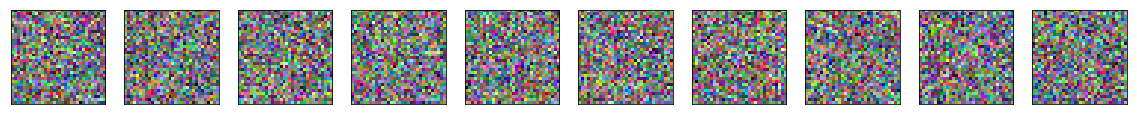

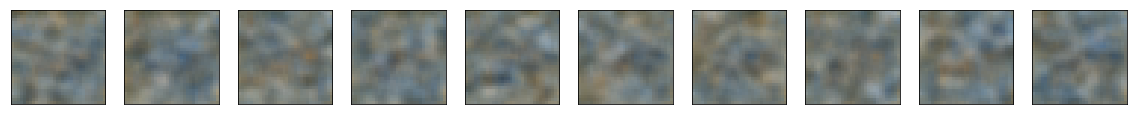

In [16]:
cifar10_mean = np.mean(x_train)
cifar10_std = np.std(x_train)
gaussian_data = np.random.normal(
    cifar10_mean, cifar10_std, size=(10000, 32, 32, 3))

guassian_data = np.clip(gaussian_data, 0., 1.)

show_10_images(gaussian_data)
show_10_images(autoencoder.predict(gaussian_data))

In [17]:
labels = len(x_test) * [0] + len(gaussian_data) * [1]
test_samples = np.concatenate((x_test, gaussian_data))
losses = anomaly_detector.predict(test_samples)
print("AUROC:", roc_auc_score(labels, losses))

AUROC: 0.9999223549999999


## Uniform Noise

CIFAR10 mean: 0.4733649
Uniform mean: 0.47327539918529843
CIFAR10 std: 0.25156906
Uniform std: 0.25156576369332034


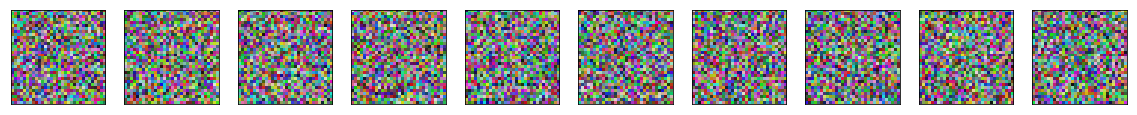

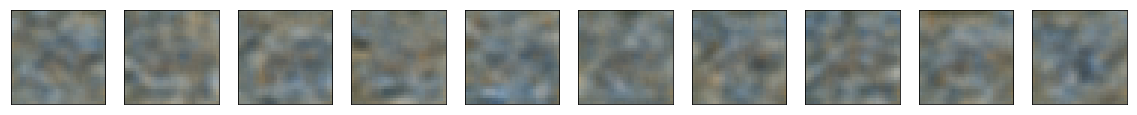

In [18]:
import math
b = math.sqrt(3.) * cifar10_std
a = -b + cifar10_mean
b += cifar10_mean

uniform_data = np.random.uniform(low=a, high=b, size=(10000, 32, 32, 3))

print("CIFAR10 mean:", cifar10_mean)
print("Uniform mean:", np.mean(uniform_data))
print("CIFAR10 std:", cifar10_std)
print("Uniform std:", np.std(uniform_data))

show_10_images(uniform_data)
show_10_images(autoencoder.predict(uniform_data))

In [19]:
labels = len(x_test) * [0] + len(uniform_data) * [1]
test_samples = np.concatenate((x_test, uniform_data))
losses = anomaly_detector.predict(test_samples)
print("AUROC:", roc_auc_score(labels, losses))

AUROC: 0.999924915
